# Data Science Project in Python- Build a machine learning algorithm that automatically suggests the right product prices.

## Mercari, Japan’s biggest community-powered shopping app, knows this problem deeply. They’d like to offer pricing suggestions to sellers, but this is tough because their sellers are enabled to put just about anything, or any bundle of things, on Mercari's marketplace.

## In this machine learning project, we will build an algorithm that automatically suggests the right product prices. You’ll be provided user-inputted text descriptions of their products, including details like product category name, brand name, and item condition.

In [ ]:
library(data.table)
library(stringr)
library(ggplot2)

In [4]:
test = fread('https://s3.amazonaws.com/hackerday.datascience/109/test.tsv')
train = fread('https://s3.amazonaws.com/hackerday.datascience/109/train.tsv')


In [7]:
dim(test)

[1] 29999     7

In [8]:
dim(train)

[1] 29999     8

In [10]:
#Exploratory Data Analysis
# univariate
# bivariate

In [11]:
summary(train)

    train_id         name           item_condition_id category_name     
 Min.   :    0   Length:29999       Min.   :1.000     Length:29999      
 1st Qu.: 7500   Class :character   1st Qu.:1.000     Class :character  
 Median :14999   Mode  :character   Median :2.000     Mode  :character  
 Mean   :14999                      Mean   :1.906                       
 3rd Qu.:22498                      3rd Qu.:3.000                       
 Max.   :29998                      Max.   :5.000                       
  brand_name            price            shipping      item_description  
 Length:29999       Min.   :   0.00   Min.   :0.0000   Length:29999      
 Class :character   1st Qu.:  10.00   1st Qu.:0.0000   Class :character  
 Mode  :character   Median :  17.00   Median :0.0000   Mode  :character  
                    Mean   :  26.95   Mean   :0.4477                     
                    3rd Qu.:  29.00   3rd Qu.:1.0000                     
                    Max.   :1506.00   Max.   

In [12]:
summary(test)

    test_id          name           item_condition_id category_name     
 Min.   :    0   Length:29999       Min.   :1.000     Length:29999      
 1st Qu.: 7500   Class :character   1st Qu.:1.000     Class :character  
 Median :14999   Mode  :character   Median :2.000     Mode  :character  
 Mean   :14999                      Mean   :1.911                       
 3rd Qu.:22498                      3rd Qu.:3.000                       
 Max.   :29998                      Max.   :5.000                       
  brand_name           shipping      item_description  
 Length:29999       Min.   :0.0000   Length:29999      
 Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Median :0.0000   Mode  :character  
                    Mean   :0.4484                     
                    3rd Qu.:1.0000                     
                    Max.   :1.0000                     

In [15]:
# Guided approach:
#1. what is the variation in prices?
#2. How good the products are?
#3. Comment of the shipping condition, how good the shipping condition is?
#4. What are the most expensive brands present?
#5. does expensive brands posses higher prices?
#6. How many product categories are there?
#7. Does the prices vary by product categories?

In [21]:
# Use hypothesis testing process and answer the questions.
x = c(12,12,32,34,43)

https://s3.amazonaws.com/hackerday.datascience/109/test.tsv
https://s3.amazonaws.com/hackerday.datascience/109/train.tsv

In [28]:
object.size(train)

9708592 bytes

In [30]:
range(train$price)

[1]    0 1506

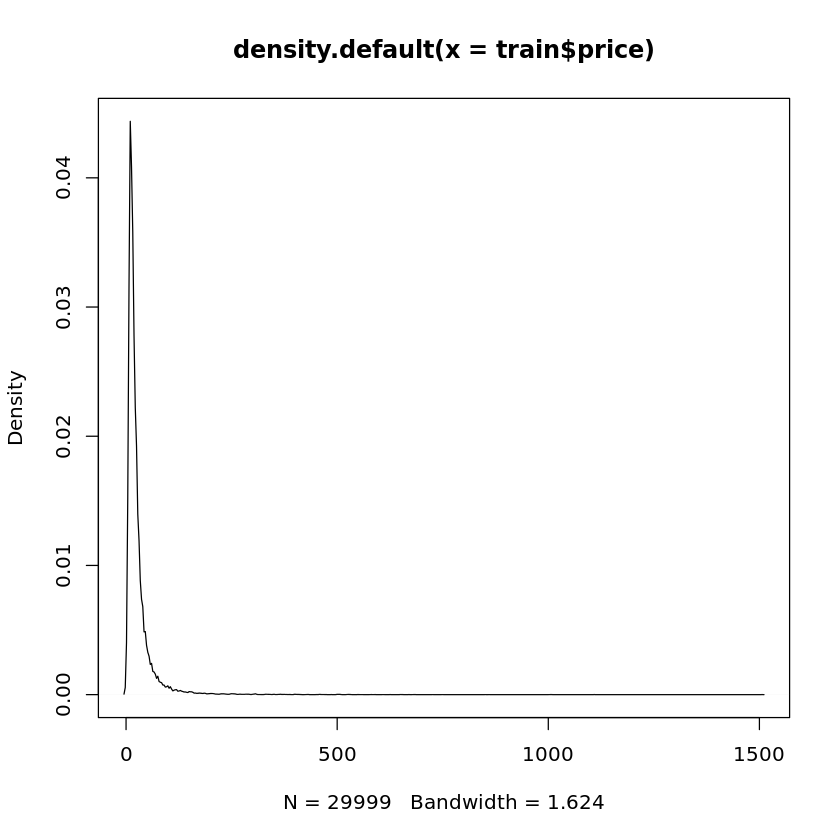

In [31]:
plot(density(train$price))

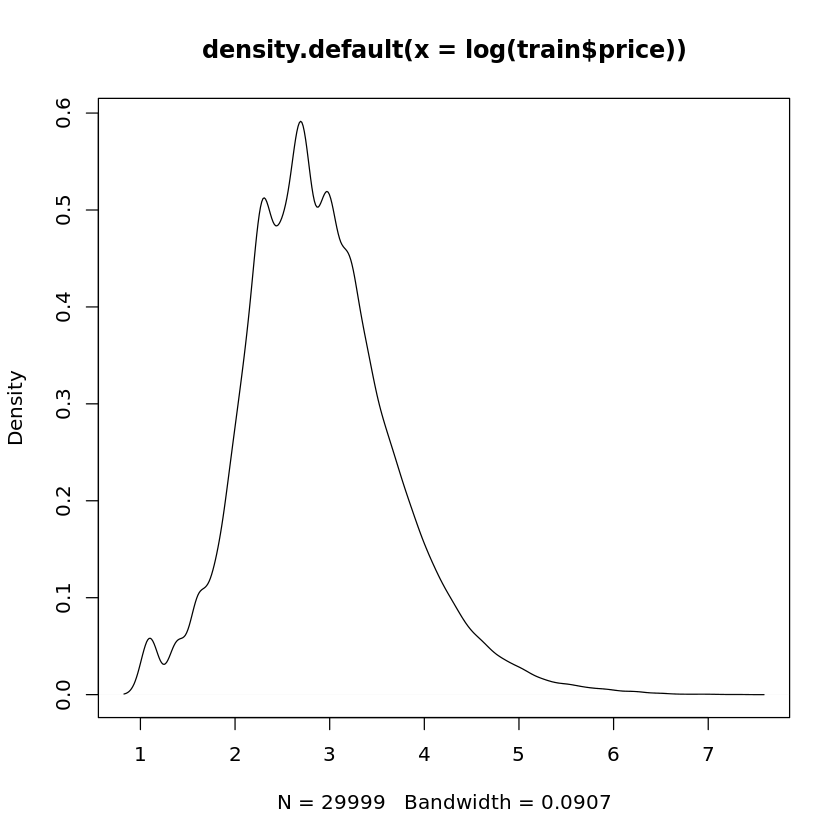

In [32]:
plot(density(log(train$price)))

In [36]:
library(ggplot2)
ggplot(data=train,aes(x=price)) + geom_histogram(fill='red') + labs(title='Histogram of Prices')

In [37]:
print(object.size(train),units='Mb')
print(object.size(test),units='Mb')

library(ggplot2)


9.3 Mb
9 Mb


In [38]:
## Guided approach:
#1. what is the variation in prices?
ggplot(data=train,aes(x=price)) + 
  geom_histogram(fill='red') + 
  labs(title='Histogram of Prices')

ggplot(data=train,aes(x=log(price))) + 
  geom_histogram(fill='red') + 
  labs(title='Histogram of Prices')


In [ ]:
#2. How good the products are (condition of the products)?
table(train$item_condition_id)
library(dplyr)
train[,.N, by= item_condition_id] %>%
  ggplot(aes(x=as.factor(item_condition_id),y=N/1000)) +
  geom_bar(stat = 'identity',fill='blue') 



In [39]:
# which condition ID is superior in terms of prices?
train[,.(.N,Med_price=median(price),Mean_price = mean(price)), 
      by= item_condition_id] 

ggplot(data=train,aes(x=as.factor(item_condition_id),y=log(price+1))) +
  geom_boxplot(fill='orange',color='blue') 

ggplot(data=train,aes(x=as.factor(item_condition_id),y=price)) +
  geom_boxplot(fill='orange',color='blue') 


In [40]:
#3. Comment on the shipping condition, how good the shipping condition is?
#OR
# The items that are paid by the seller has better price than not paid by 
# the seller?
table(train$shipping)/nrow(train)

train %>%
  ggplot(aes(x=log(price+1),fill=factor(shipping))) +
  geom_density(alpha=0.5)



        0         1 
0.5522851 0.4477149 

In [41]:
# t-test helps in checking the statistical significance of two group means
t.test(train$price~train$shipping)



	Welch Two Sample t-test

data:  train$price by train$shipping
t = 17.581, df = 29996, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 7.137901 8.929136
sample estimates:
mean in group 0 mean in group 1 
       30.55031        22.51679 


In [42]:
#4. What are the top 10 most expensive brands present?
par(mfrow=c(1,2))

train[,.(med_price = median(price)), by= brand_name] %>%
  head(10) %>%
  ggplot(aes(x= reorder(brand_name,med_price),y=med_price)) +
  geom_point(color='red') +
  coord_flip() +
  scale_y_continuous(labels = scales::dollar)

train[,.(mean_price = mean(price)), by= brand_name] %>%
  head(10) %>%
  ggplot(aes(x= reorder(brand_name,mean_price),y=mean_price)) +
  geom_point(color='red') +
  coord_flip() +
  scale_y_continuous(labels = scales::dollar)



ERROR: Error in ContinuousRange$new(): `inherit` must be a R6ClassGenerator.


In [43]:
#5. does expensive brands posses higher prices?
train[,.(mean_price = mean(price)), by= brand_name]



In [ ]:
#6. How many product categories are there?
table(train$category_name)

unique(train$category_name)

length(unique(train$category_name))

sort(table(train$category_name),decreasing = T)[1:10]


In [ ]:
#7. Does the prices vary by product categories? Analyze the prices
# by different category?

# what are the product categories with the highest selling price?
train[,.(median_price = median(price)), by= category_name][order(median_price,decreasing = T)][1:15] %>%
  ggplot(aes(x=reorder(category_name,median_price),y=median_price)) +
  geom_point(color = 'blue') +
  coord_flip() 


In [ ]:
# splitting the columns based on regex '/'
library(data.table)
train[,c('level1_cat','level2_cat') := tstrsplit(train$category_name,split='/',keep = c(1,2))]

head(train[,c('level1_cat','level2_cat')])

table(train$level1_cat)

table(train$level2_cat)


In [ ]:
#average prices by level 1 category
train %>%
ggplot(aes(x=level1_cat,y=log(price+1))) +
  geom_boxplot(fill='orange',color = 'blue') +
  coord_flip() 

train %>%
  ggplot(aes(x=level2_cat,y=log(price+1))) +
  geom_boxplot(fill='orange',color = 'blue') +
  coord_flip() 

head(train)


In [ ]:
fit <- lm(price~factor(item_condition_id)+factor(shipping),data=train)
summary(fit)

fit <- lm(price~factor(item_condition_id)+
            factor(shipping)+
            factor(level1_cat)+
            factor(level2_cat),data=train)
summary(fit)


In [ ]:
# we cannot train a regression based model since the R-square value is less than 1%

# we need to create better features
# calculate the item description length
train[,desc_len := nchar(item_description)]

summary(train$desc_len)

cor(train$desc_len,train$price)

cor.test(train$desc_len,train$price)


In [ ]:
# spurious correlation

#let's do some text analysis
train[item_description == 'No Description Found', item_description := NA]

# create a text corpus to perform text analysis
library(tm)
library(quanteda)
dcorpus <- corpus(train$item_description)
summary(dcorpus)[1:5,]


In [ ]:
# create a context
kwic(dcorpus,phrase('Computers and Tablets'),valuetype = 'fixed') %>%
  head()


In [ ]:
# term document matrix/document frequency matrix to extract features from the text data
dfm1 <- dfm(
  dcorpus,
  ngrams=1,
  remove = c('rm',stopwords('english')),
  remove_punct=T,
  remove_numbers = T,
  stem=T)


In [ ]:
# N-gram approach to extract the top features
tf <- topfeatures(dfm1,n=30)

#let's visualize the top features
data.frame(term=names(tf),freq=unname(tf)) %>%
  ggplot(aes(x=reorder(term,freq),y=freq/1000)) +
  geom_bar(stat = 'identity',fill='red') +
  coord_flip()



In [ ]:
#visualize the word cloud representation
#textplot_wordcloud(dfm1,min.freq=2,rot.per=0.2)

# term document matrix/document frequency matrix to extract features from the text data
dfm2 <- dfm(
  dcorpus,
  ngrams=2,
  remove = c('rm',stopwords('english')),
  remove_punct=T,
  remove_numbers = T,
  concatenator=' ')


In [ ]:
# N-gram approach to extract the top features
tf <- topfeatures(dfm2,n=30)

#let's visualize the top features
data.frame(term=names(tf),freq=unname(tf)) %>%
  ggplot(aes(x=reorder(term,freq),y=freq/1000)) +
  geom_bar(stat = 'identity',fill='red') +
  coord_flip()



In [ ]:
#visualize the word cloud representation
#textplot_wordcloud(dfm1,min.freq=2,rot.per=0.2)

# term document matrix/document frequency matrix to extract features from the text data
dfm3 <- dfm(
  dcorpus,
  ngrams=3,
  remove = c('rm',stopwords('english')),
  remove_punct=T,
  remove_numbers = T,
  concatenator=' ')

# N-gram approach to extract the top features
tf <- topfeatures(dfm3,n=30)

#let's visualize the top features
data.frame(term=names(tf),freq=unname(tf)) %>%
  ggplot(aes(x=reorder(term,freq),y=freq/1000)) +
  geom_bar(stat = 'identity',fill='red') +
  coord_flip()


In [ ]:
#visualize the word cloud representation
#textplot_wordcloud(dfm1,min.freq=2,rot.per=0.2)
# term document matrix/document frequency matrix to extract features from the text data
dfm4 <- dfm(
  dcorpus,
  ngrams=4,
  remove = c('rm',stopwords('english')),
  remove_punct=T,
  remove_numbers = T,
  concatenator=' ')

# N-gram approach to extract the top features
tf <- topfeatures(dfm4,n=30)

#let's visualize the top features
data.frame(term=names(tf),freq=unname(tf)) %>%
  ggplot(aes(x=reorder(term,freq),y=freq/1000)) +
  geom_bar(stat = 'identity',fill='red') +
  coord_flip()


In [ ]:
#visualize the word cloud representation
#textplot_wordcloud(dfm1,min.freq=2,rot.per=0.2)

train %>% head()



feat_brand_new <- ifelse(grepl('brand new with tags',train$item_description) |
                           grepl('brand new',train$item_description),1,0)
table(feat_brand_new)

train$brand_new <- feat_brand_new

feat_free_ship <- ifelse(grepl('free shipping',train$item_description) |
                           grepl('free',train$item_description),1,0)
table(feat_free_ship)

train$free_ship <- feat_free_ship

feat_condition <- ifelse(grepl('great condition',train$item_description) |
                           grepl('good condition',train$item_description),1,0)
table(feat_condition)

train$condition <- feat_condition

feat_gold <- ifelse(grepl('gold',train$name) |
                           grepl('jewelery',train$category_name),1,0)
table(feat_gold)

train$gold_item <- feat_gold


In [ ]:
# please fix the errors related to the library, if possible run it locally.